# Criação do Dataset Balanceado

In [ ]:
from py.SimilarityAnalysis import create_balanced_dataset

create_balanced_dataset(
    src_dir="datasets/CICDDoS2019/Origin/01-12", 
    dest_dir="datasets/CICDDoS2019/data/Classification", 
    output_filename="Balanced_0112.CSV", 
    n_samples_per_class=10000,
    chunk_size=100000,
    target_files=None,
    ignored_classes=['WebDDoS'],
    allow_insufficient=True,
    logging=True
)

In [ ]:
from py.SimilarityAnalysis import create_balanced_dataset

create_balanced_dataset(
    src_dir="datasets/CIC-IDS-2017/Origin", 
    dest_dir="datasets/CIC-IDS-2017/data/Classification", 
    output_filename="Balanced.CSV", 
    n_samples_per_class=5000,
    chunk_size=100000,
    target_files=['Friday-WorkingHours-Afternoon-DDos.csv', 'Wednesday-workingHours.csv'],
    ignored_classes=['Heartbleed'],
    allow_insufficient=False,
    logging=True
)

PROCESSAMENTO OTIMIZADO (CHUNKS): Balanced.CSV
Arquivos Selecionados: 2
Tamanho do Lote (Chunksize): 100000
Classes Ignoradas: ['Heartbleed']

[1/3] Varredura global (Lendo em lotes)...
[2/3] Validando quantidades disponíveis...

[3/3] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: Friday-WorkingHours-Afternoon-DDos.csv
   -> Processando: Wednesday-workingHours.csv
      [IO] Salvando lote final (30000 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CIC-IDS-2017/data/Classification\Balanced.CSV


# Ordenando cronológicamente as amostras

In [ ]:
from py.SimilarityAnalysis import sort_dataset_by_timestamp

sort_dataset_by_timestamp(file_path="datasets/CIC-IDS-2017/data/Classification/Balanced.CSV", logging=True)

INICIANDO ORDENAÇÃO CRONOLÓGICA: Balanced.CSV
 [INFO] Coluna de tempo identificada: 'Timestamp'. Convertendo dados...
 [INFO] Ordenando as amostras...
 [INFO] Salvando atualizações no arquivo: datasets/CIC-IDS-2017/data/Classification/Balanced.CSV...

 ORDENAÇÃO CONCLUÍDA COM SUCESSO
Total de Amostras no Arquivo: 30000
------------------------------
Contagem por Rótulo (Label):
Label
DoS slowloris       5000
DoS Slowhttptest    5000
DoS Hulk            5000
DoS GoldenEye       5000
BENIGN              5000
DDoS                5000
Name: count, dtype: int64


# Criando gráfico de radar

In [139]:
from py.Streams import newStream
import pandas as pd

df = pd.read_csv('datasets/CICDDoS2019/data/Classification/Balanced_0112.CSV')

df, target_names, feature_names = newStream(
    df=df, 
    target_label_col='Label', 
    binary_label=False, 
    normalize_method="MinMaxScaler", 
    threshold_var=0.001,
    threshold_corr=None,
    top_n_features=15,
    stream=False,
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol'],
    imputation_method='mediana'
)

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com a MEDIANA das colunas...
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Iniciando pipeline de redução de dimensionalidade...

--- Iniciando Processo de Seleção de Features (Total: 78) ---
Variância: 46 features removidas. Restantes: 32
Remover Correlação: Pular.
Random Forest: Top 15 selecionadas.
Features Finais (15) - ['Average Packet Size', 'Avg Fwd Segment Size', 'Packet Length Mean', 'Fwd Packet Length Mean', 'Min Packet Length', 'Fwd Packet Length Min', 'Flow Duration', 'Fwd IAT Total', 'Flow Bytes/s', 'Fwd IAT Std', 'Flow IAT Max', 'Init_Win_bytes_forward', 'Flow IAT Std', 'min_seg_size_forward', 'ACK Flag Count']
--- Fim do Processo de Seleção de Features ---

Finalização: Retornando DataFrame pandas processado.



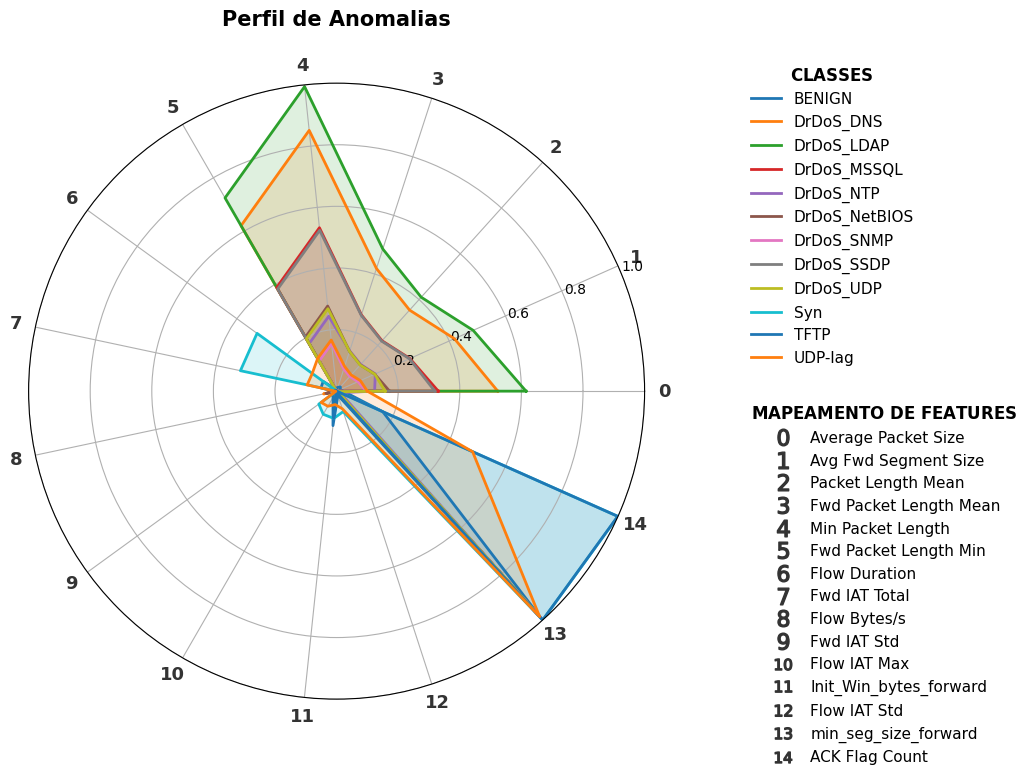

In [ ]:
from py.SimilarityAnalysis import plot_feature_radar

plot_feature_radar(df, target_names, feature_names)

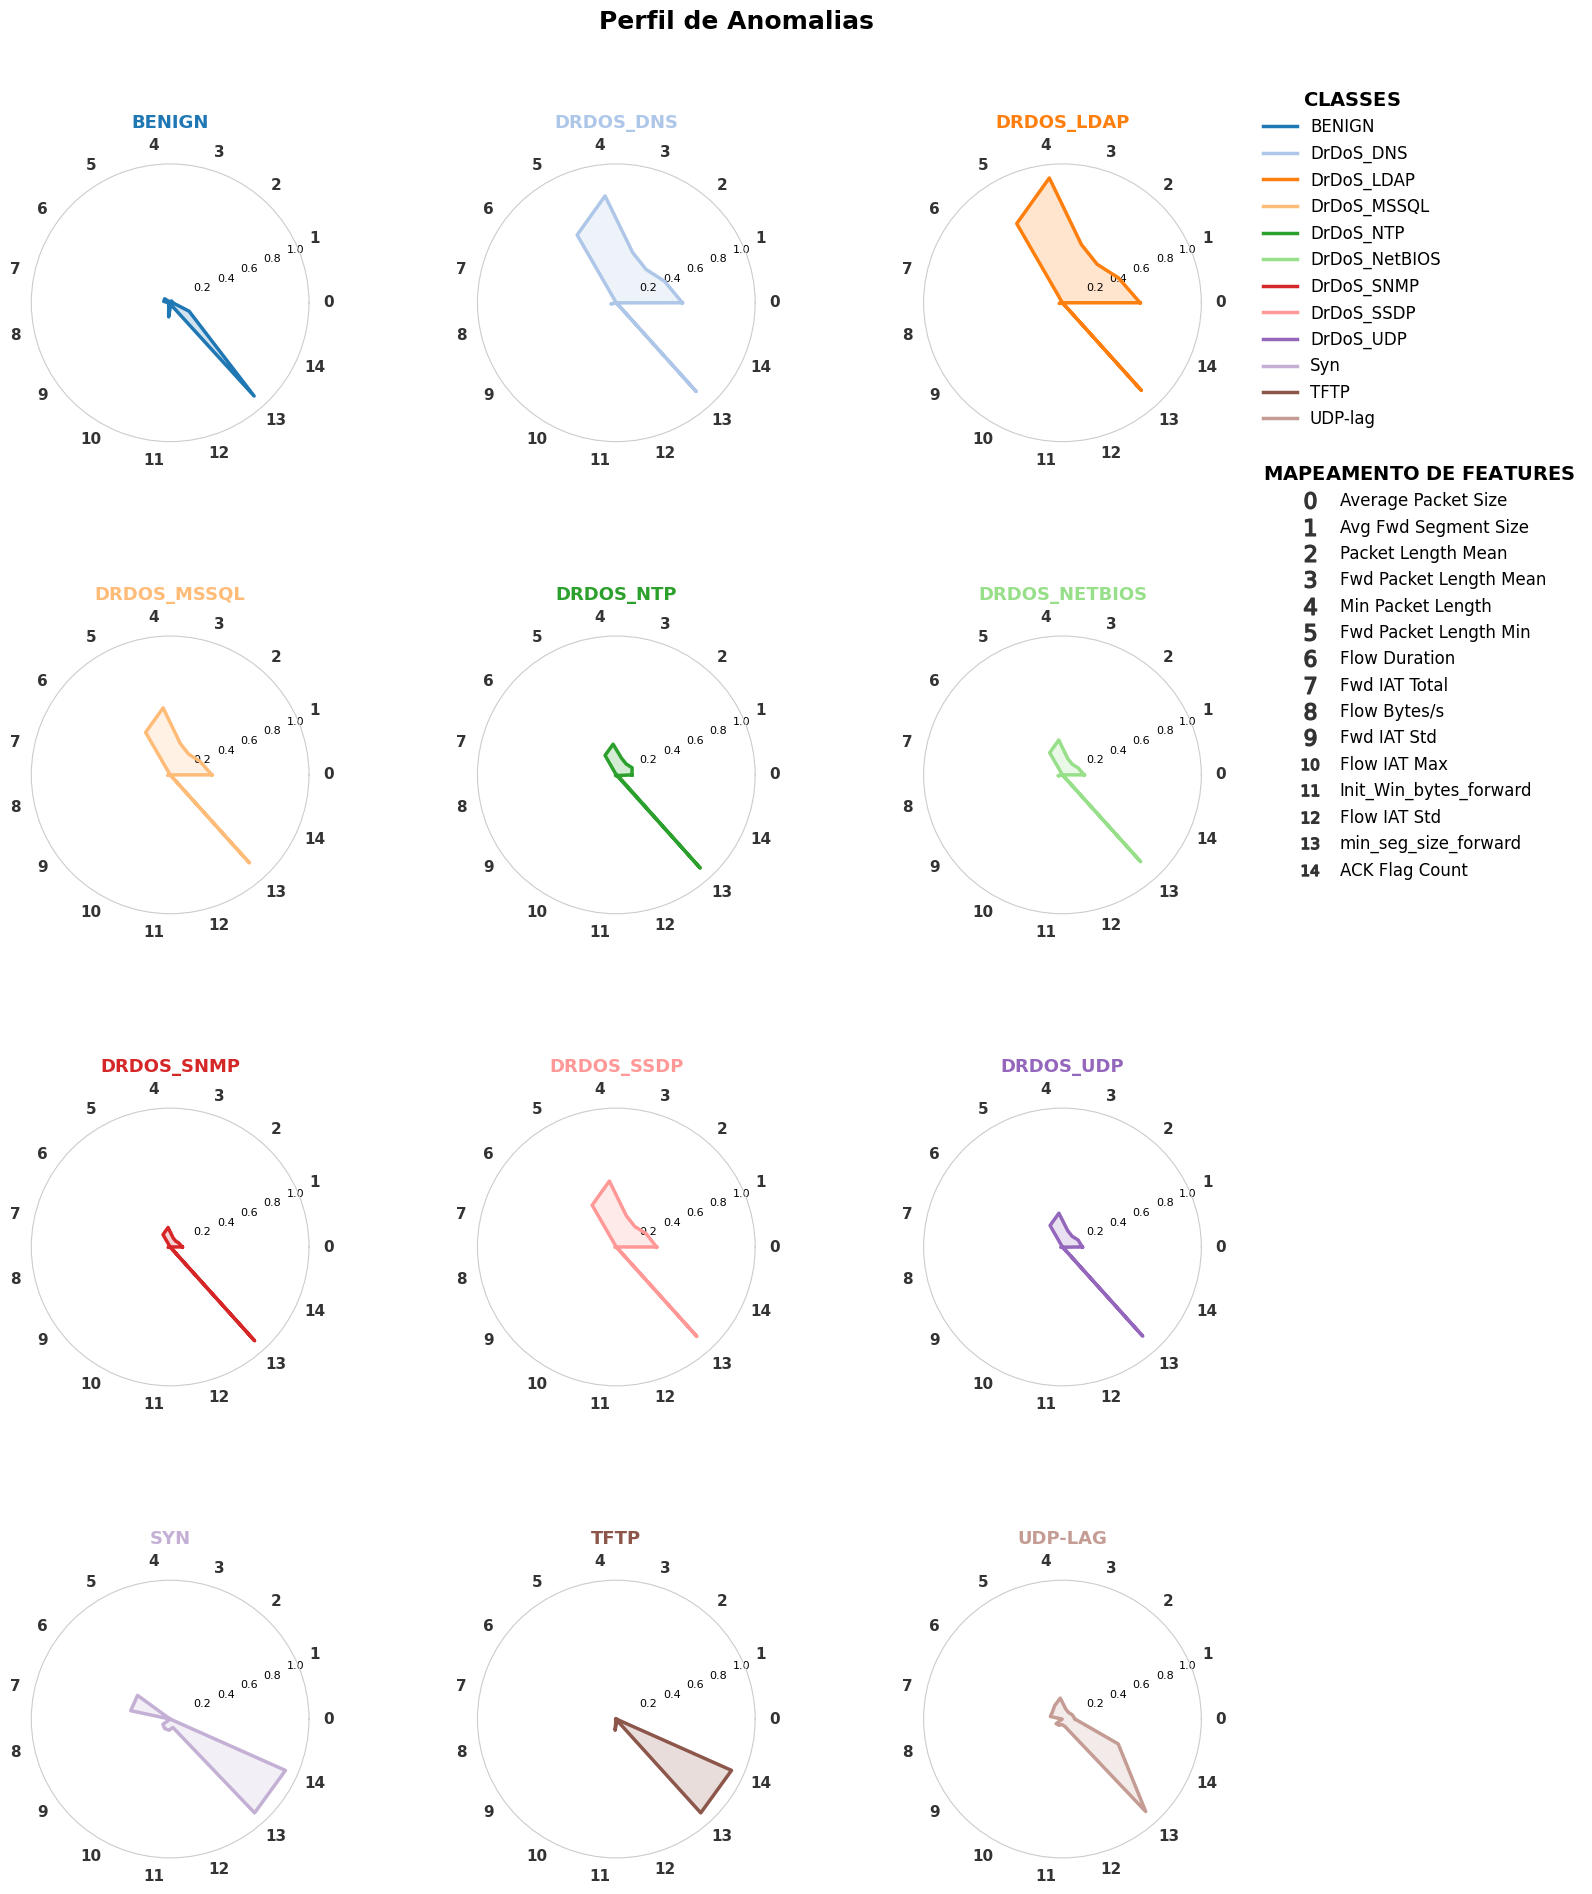

In [ ]:
from py.SimilarityAnalysis import plot_mini_radars

plot_mini_radars(df, target_names, feature_names)

# Criação de cenários